In [3]:
import pandas as pd 
df = pd.read_csv("./car+evaluation/car.data")

In [5]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
df.columns = col_names

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [17]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [19]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [21]:
df.describe(include='all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [23]:
 for col in col_names:
     print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [30]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [34]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [36]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [38]:
x

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0
2,3.0,3.0,0.0,0.0,1.0,1.0
3,3.0,3.0,0.0,0.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0
1723,1.0,1.0,3.0,2.0,1.0,0.0
1724,1.0,1.0,3.0,2.0,0.0,1.0
1725,1.0,1.0,3.0,2.0,0.0,2.0


In [40]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1722    1.0
1723    3.0
1724    2.0
1725    1.0
1726    3.0
Name: class, Length: 1727, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()

In [48]:
clf1.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
pred1 = clf1.predict(x_test)

In [52]:
pred1

array([0., 2., 2., 2., 2., 3., 2., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2.,
       2., 0., 2., 2., 2., 3., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       1., 0., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 0., 2., 0., 0.,
       0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 3., 2., 0., 2., 2., 0., 0., 0., 2., 0.,
       0., 2., 3., 2., 2., 2., 2., 2., 2., 2., 3., 0., 3., 2., 2., 2., 2.,
       2., 2., 3., 0., 2., 2., 0., 2., 2., 2., 2., 3., 2., 0., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 3., 2., 2., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 3., 0., 0.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 2., 2., 0.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2.

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred1, y_test)
print(accuracy)

0.9653179190751445


In [60]:
from yellowbrick.model_selection import validation_curve

In [88]:
num_est = [100, 200, 400, 450, 500, 750, 1000]

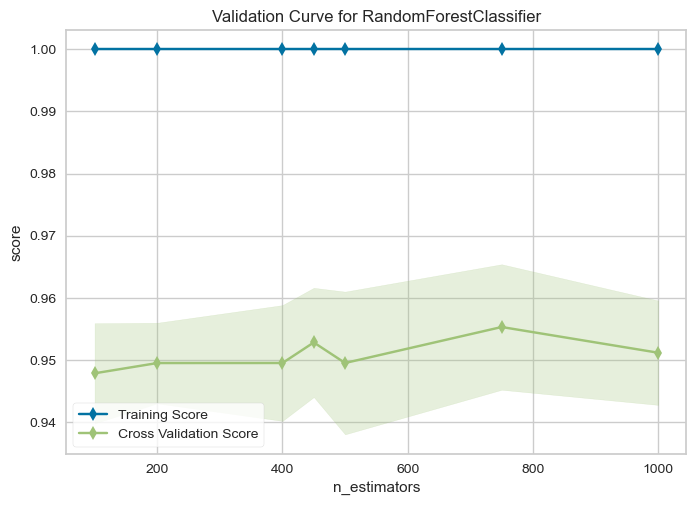

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  400,  450,  500,  750, 1000]),
                scoring='accuracy')


In [86]:

print(validation_curve(RandomForestClassifier(), X= x_train, y = y_train, param_name= 'n_estimators', param_range=num_est, scoring='accuracy', cv=3))

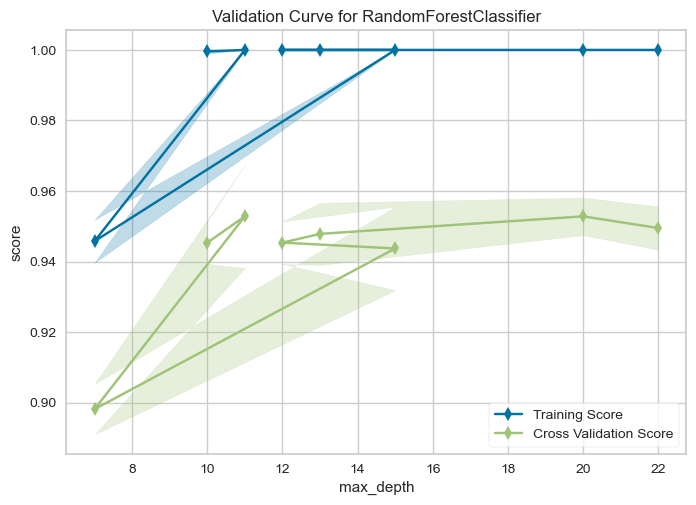

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10, 11,  7, 15, 12, 13, 20, 22]),
                scoring='accuracy')


In [92]:
depth_val = [10, 11,7,15,12,13,20,22]
print(validation_curve(RandomForestClassifier(), X= x_train, y = y_train, param_name= 'max_depth', param_range=depth_val, scoring='accuracy', cv=3))

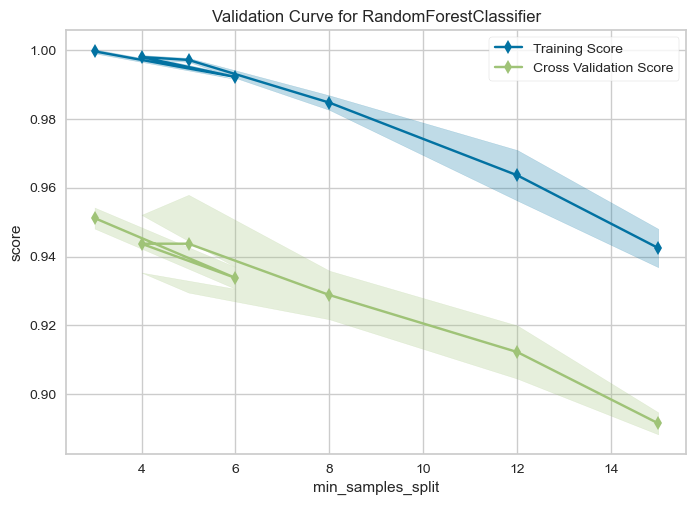

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 1,  3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [94]:
min_samples = [1,3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(), X= x_train, y = y_train, param_name= 'min_samples_split', param_range=min_samples, scoring='accuracy', cv=3))

In [102]:
clf2 = RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_depth=22, random_state=0)
clf2.fit(x_train, y_train)

pred2 = clf2.predict(x_test)

accuracy2 = accuracy_score(pred2, y_test)

print(accuracy2)

0.9672447013487476


In [104]:
feature_scores = pd.Series(clf2.feature_importances_, index=x_train.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.274768
persons     0.229919
buying      0.182334
maint       0.154721
lug_boot    0.088564
doors       0.069694
dtype: float64


Text(0.5, 0, 'features importance score')

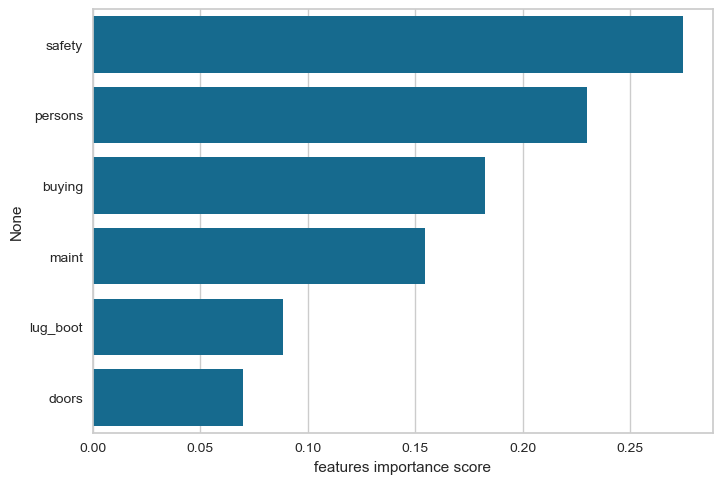

In [106]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('features importance score')

In [120]:
clf3 = RandomForestClassifier()
Xn = x.drop(['doors', 'lug_boot', 'maint'], axis=1)
yn = df['class']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(Xn, yn, test_size=0.3)

clf3.fit(X_train_n, y_train_n)

new_pred = clf3.predict(X_test_n)

In [122]:
accuracy3 = accuracy_score(new_pred, y_test_n)
print(accuracy3)

0.8034682080924855
